# Floyd Warshall

## Korets Khrystyna

### My task in this lab was to implement Floyd Worshall's algorithm for an arbitrary directed graph and compare my algorithm with the built-in one.

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

#### Generating a random connected graph:

In [2]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.spring_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

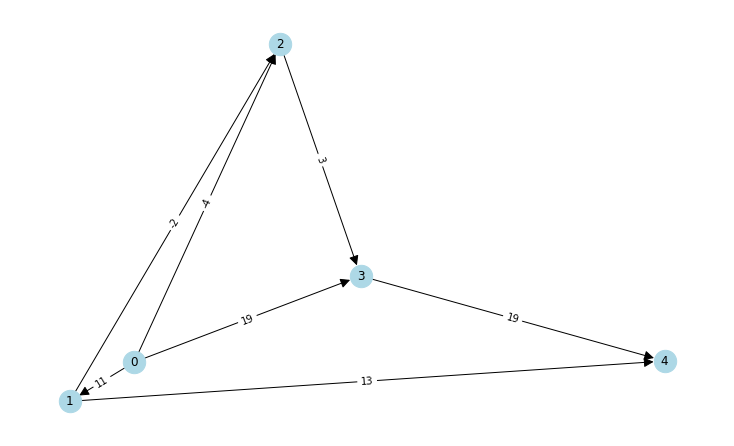

In [3]:
G = gnp_random_connected_graph(5, 0.5, True, True)

## Built-in algorithm:

In [4]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [5]:
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 1: 11, 2: -4, 3: -1, 4: 18}
Distances with 1 source: {1: 0, 4: 13, 2: -2, 0: inf, 3: 1}
Distances with 2 source: {2: 0, 3: 3, 0: inf, 1: inf, 4: 22}
Distances with 3 source: {3: 0, 4: 19, 0: inf, 1: inf, 2: inf}
Distances with 4 source: {4: 0, 0: inf, 1: inf, 2: inf, 3: inf}


## My implementation of the algorithm

#### The implementation of my algorithm completely reproduces all the steps of Floyd Worshall's original algorithm, comparing the elements of the matrix in a certain sequence. Namely:
##### The Floyd-Worshall algorithm finds the shortest paths between all pairs of vertices in a weighted directed graph. It works like this:
##### Initialize the distance matrix, where each element i, j is the distance from vertex i to vertex j. If there is no direct edge between vertices i and j, the distance is considered infinite.
##### After initialization, we look at each vertex and consider the possible paths through this vertex to find the shortest paths. If the path through this vertex is shorter than the current shortest path, update the distance.
##### Repeat step 2 for each vertex.
##### After the algorithm is complete, the distance matrix will contain the shortest distances between all pairs of vertices.

In [6]:
def floyd_warshall_(graph):
    edges = list(graph.edges(data=True))
    edge = []
    for i in edges:
        edge.append(i[0:2] + (i[2]['weight'],))
    vertices = max(max(i[0], i[1]) for i in edge) + 1  # Increment by 1
    dist = [[float('inf')] * vertices for _ in range(vertices)]  # creating matrix with inf values
    for i in range(vertices):
        dist[i][i] = 0  # set zero to path that start and end in one point
    for j in edge:
        dist[j[0]][j[1]] = j[-1]  # set weight of each path
    for t in range(vertices):
        for i in range(vertices):
            for j in range(vertices):
                dist[i][j] = min(dist[i][j], dist[i][t] + dist[t][j])
    return dist

In [7]:
path = []
for i in floyd_warshall_(G):
    a = {}
    for j in range(len(i)):
        a[j] = i[j]
    path.append(a)
for i, el in enumerate(path):
    print(f"Distances with {i} source: {el}")


Distances with 0 source: {0: 0, 1: 11, 2: -4, 3: -1, 4: 18}
Distances with 1 source: {0: inf, 1: 0, 2: -2, 3: 1, 4: 13}
Distances with 2 source: {0: inf, 1: inf, 2: 0, 3: 3, 4: 22}
Distances with 3 source: {0: inf, 1: inf, 2: inf, 3: 0, 4: 19}
Distances with 4 source: {0: inf, 1: inf, 2: inf, 3: inf, 4: 0}


## Time measurement and comparison of the algorithm with the built-in one

In [148]:
import time
from tqdm import tqdm

#### Built-in:

In [149]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    floyd_warshall(G)
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [02:46<00:00,  5.99it/s]


0.160823828458786

#### My implementation:

In [150]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    floyd_warshall_predecessor_and_distance(G) 
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [04:28<00:00,  3.73it/s]


0.26324754643440246

### Graph for comparison:

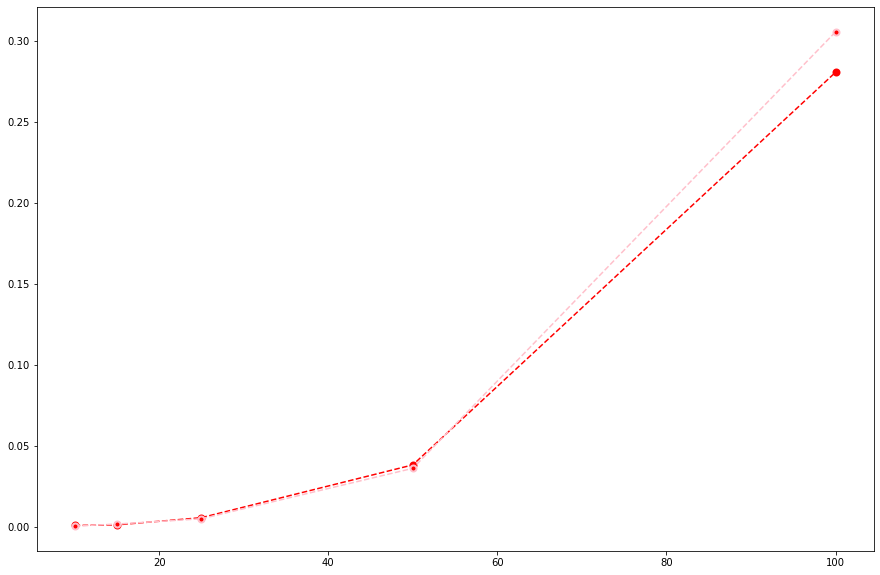

In [151]:
x = [10, 15, 25, 50, 100]
y = [0.0008993406295776368,0.0012524688243865966, 0.005702060222625732, 0.038260842561721804, 0.28047805762290956] #my algorithm
z = [0.000500751256942749, 0.0017526607513427734, 0.005013889551162719, 0.03614046788215637, 0.305418753862381] #inner algorithm
plt.figure(figsize=(15, 10))
plt.plot(x, y, color='red', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.plot(x, z, color='pink', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.show()


##### You can see from the graph that my implementation takes less time on graphs with a large number of vertices, while they work almost identically on graphs with <50 vertices.